In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import plotly.offline as pyo
from plotly import subplots
import plotly.graph_objects as go
from baseFunctions import *
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [224]:
train = pd.read_csv('../train.csv')
oil = pd.read_csv('../oil.csv')
stores = pd.read_csv('../stores.csv')
transactions = pd.read_csv('../transactions.csv')
test = pd.read_csv('../test.csv')
holidays = pd.read_csv('../holidays_events.csv')
sampleSub = pd.read_csv('../sample_submission.csv')

In [230]:
train0 = pd.merge(train, stores, on=['store_nbr'], how='outer')
print(train.shape, train0.shape)

oil['date'] = pd.to_datetime(oil['date'])
oil.set_index('date',inplace=True)
oil_resampled = oil.resample('1D').asfreq()
print(oil_resampled.isna().sum())
oil_resampled.interpolate(inplace=True,limit_direction='both')
oil_resampled.reset_index(inplace=True)
print(oil_resampled.isna().sum())

train0['date'] = pd.to_datetime(train0['date'])
train1 = pd.merge(train0, oil_resampled, on=['date'], how='left')
print(train1.shape, train0.shape)

(3000888, 11) (3000888, 10)


In [250]:
# check that the city holidays are the same in the holiday and store df
uniqueLocalsHolidays = holidays.loc[holidays.locale =='Local'].locale_name.unique()
uniqueLocalCities = stores.city.unique()

intersection = set(uniqueLocalsHolidays).intersection(set(uniqueLocalCities))
not_intersection_list1 = set(uniqueLocalsHolidays).difference(intersection)
not_intersection_list2 = set(uniqueLocalCities).difference(intersection)

print(intersection)
print(not_intersection_list1)
print(not_intersection_list2)
#result: we have a couple cities without holidays, but that is fine, the rest is the same 

{'Santo Domingo', 'Loja', 'Guayaquil', 'Salinas', 'Riobamba', 'Ambato', 'Quevedo', 'Guaranda', 'Manta', 'Cayambe', 'Cuenca', 'Puyo', 'Esmeraldas', 'Quito', 'Libertad', 'Ibarra', 'Machala', 'El Carmen', 'Latacunga'}
set()
{'Playas', 'Daule', 'Babahoyo'}


In [309]:
holidays['date'] = pd.to_datetime(holidays['date'])
cityHolidays = holidays.loc[holidays.locale =='Local']#.locale_name.value_counts()
cityHolidays.drop('locale', axis = 1, inplace=True)
cityHolidays['description'] = 'Fundacion'
cityHolidays.rename(columns={'locale_name':'city','type':'holidayType'}, inplace=True)
cityHolidays.drop(264, axis = 0, inplace=True) # we have some duplicates
train2 = pd.merge(train1, cityHolidays, on=['date','city'], how='left')
#train2.dropna(inplace=True)
print(train1.shape, train2.shape)

/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_68941/600947355.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_68941/600947355.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_68941/600947355.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/

(3000888, 11) (3000888, 14)


In [310]:
regionalHolidays

,date,type,state,description,transferred
1,2012-04-01,Holiday,Cotopaxi,Provincializacion,False
7,2012-06-25,Holiday,Imbabura,Provincializacion,False
23,2012-11-06,Holiday,Santo Domingo de los Tsachilas,Provincializacion,False
24,2012-11-07,Holiday,Santa Elena,Provincializacion,False
47,2013-04-01,Holiday,Cotopaxi,Provincializacion,False
58,2013-06-25,Holiday,Imbabura,Provincializacion,False
76,2013-11-06,Holiday,Santo Domingo de los Tsachilas,Provincializacion,False
77,2013-11-07,Holiday,Santa Elena,Provincializacion,False
96,2014-04-01,Holiday,Cotopaxi,Provincializacion,False
112,2014-06-25,Holiday,Imbabura,Provincializacion,False


In [311]:
regionalHolidays = holidays.loc[holidays.locale =='Regional']#.locale_name.value_counts()
regionalHolidays.drop('locale', axis = 1, inplace=True)
regionalHolidays['description'] = 'Provincializacion'
regionalHolidays.rename(columns={'locale_name':'state'}, inplace=True)

train3 = pd.merge(train2, regionalHolidays, on=['date','state'], how='left', suffixes=('','_reg'))
print(train3.shape, train2.shape)

/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_68941/2497804015.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_68941/2497804015.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_68941/2497804015.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

(3000888, 17) (3000888, 14)


In [329]:
nationalHolidays = holidays.loc[holidays.locale =='National']#.locale_name.value_counts()
nationalHolidays.drop(['locale','locale_name'], axis = 1, inplace=True)
nationalHolidays.description.unique()
groups = ['Navidad', 'Mundial de futbol Brasil','Terremoto Manabi','dia del ano','Puente Dia de Difuntos','Grito de Independencia','Independencia de Guayaquil','Dia de la Madre','Batalla de Pichincha']
for group in groups:
    mask = nationalHolidays['description'].str.contains(group)
    nationalHolidays.loc[mask, 'description'] = group
nationalHolidays = nationalHolidays.drop_duplicates(subset=['date'], keep='first')

train4 = pd.merge(train3, nationalHolidays, on=['date'], how='left', suffixes=('','_nat'))
print(train3.shape, train4.shape)

/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_68941/4214834236.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(3000888, 17) (3000888, 20)


# check how to make data staionary

In [21]:
testPair = train.loc[(train.store_nbr == 6) & (train.family == 'BEAUTY')]
testPair.set_index('date', inplace=True)

<Axes: xlabel='date'>

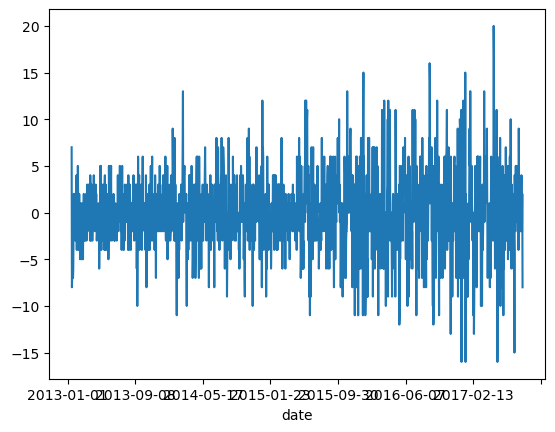

In [22]:
testPair.sales.diff(14).plot()

/Users/matthiaskargl/Codes/kaggle/store-sales-time-series-forecasting/analysis/baseFunctions.py:56: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



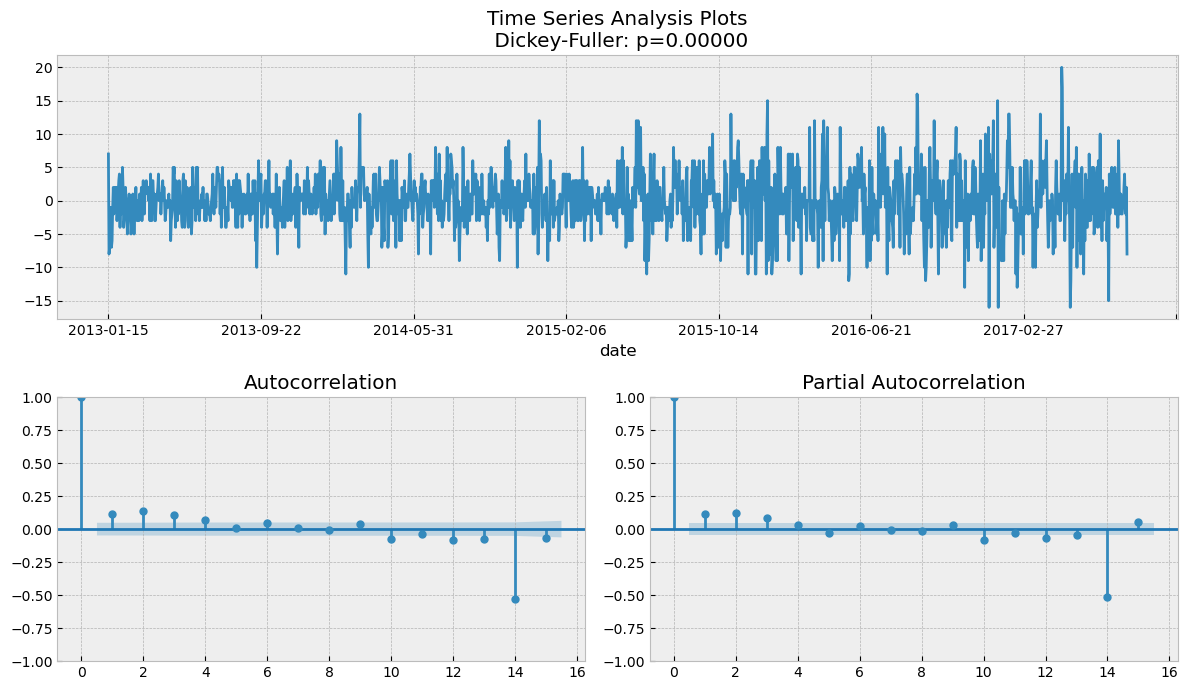

In [23]:
# peak at 14 -> predict 2 week difference
# ACF: MA (moving average) part = how many last errors we include, e.g. error at t-1, t-2,.. -> 3-4 last erors
# PACF: AR (autoregressive) part = how many lags we include                                  -> 3 lags
tsplot(testPair.sales.diff(14).dropna(),lags = 15)

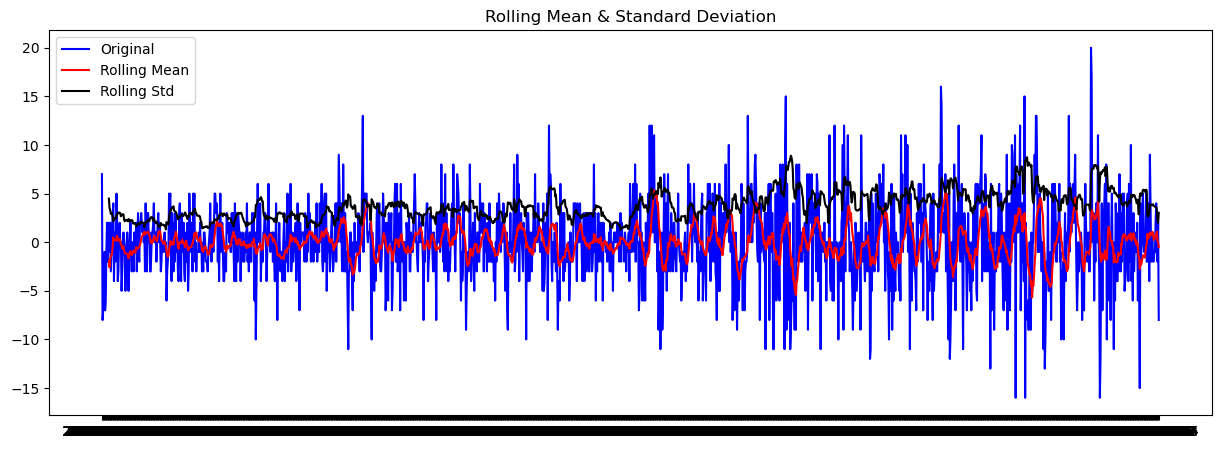

Results of Dickey-Fuller Test:
Test Statistic                -1.434382e+01
p-value                        1.049146e-26
#Lags Used                     1.600000e+01
Number of Observations Used    1.653000e+03
Critical Value (1%)           -3.434312e+00
Critical Value (5%)           -2.863290e+00
Critical Value (10%)          -2.567702e+00
dtype: float64


In [24]:
test_stationarity(testPair.sales.diff(14).dropna())

# preparing data

In [60]:
testPair['target'] = testPair.sales.diff(14)
testPair['shiftedSales14'] = testPair.sales.shift(14)

n_lags = 3
for n in range(n_lags):
    l = n+1
    testPair['target_lag'+str(l)] = testPair['target'].shift(l)

/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_68941/3109159316.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_68941/3109159316.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_68941/3109159316.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [61]:
testPair['date'] = pd.to_datetime(testPair['date'])
mask = testPair.date < pd.to_datetime("2017-01-1")
y_train = testPair['sales'][mask]
y_test = testPair['sales'][~mask]

KeyError: 'date'

# predicting stuff

## Arima

~ 0.7 rmsle

In [39]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_log_error

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



0.7380721516135471


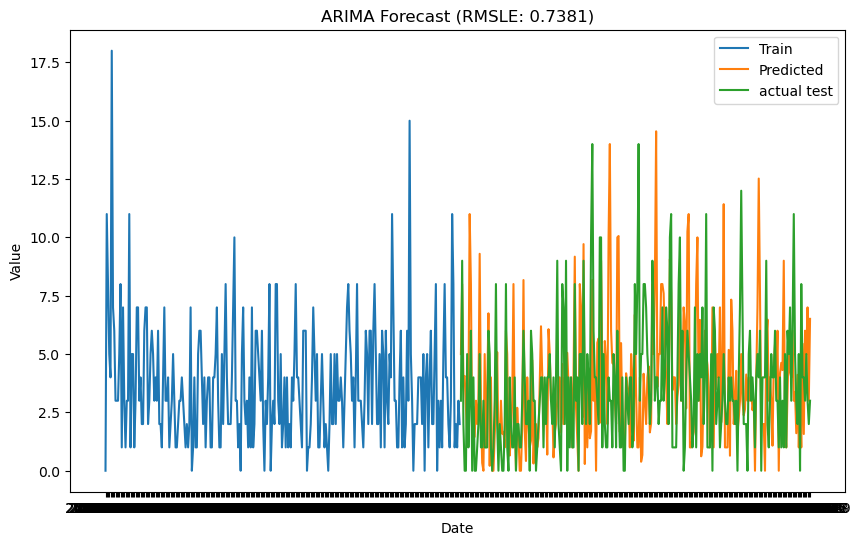

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836

0.6785449398322774


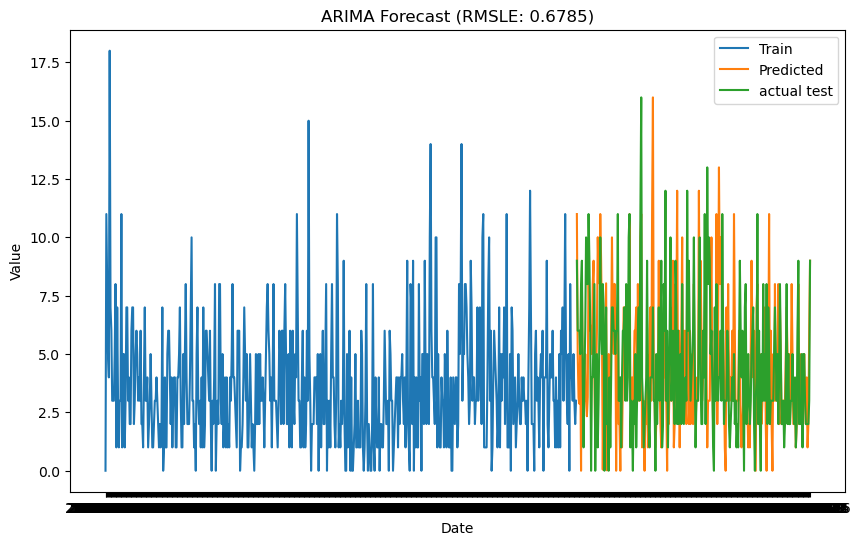

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmode

0.6640458892128454


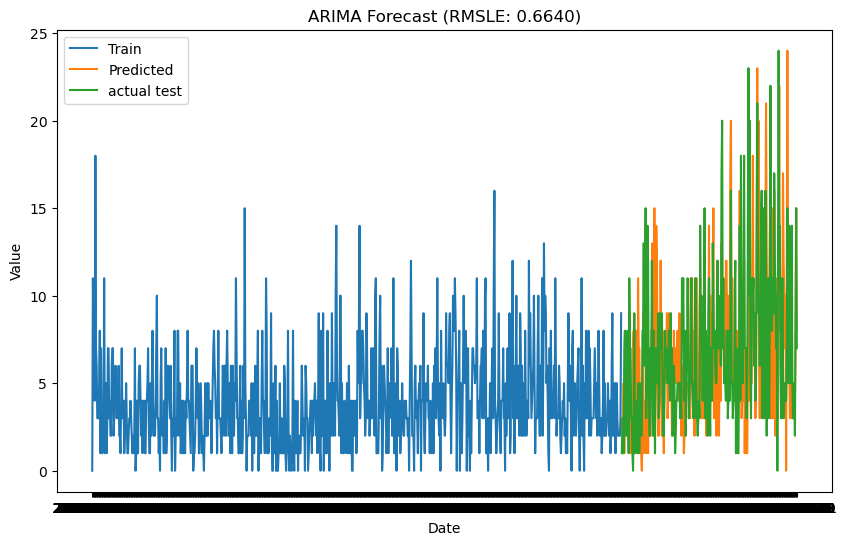

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmode

0.5800253191273078


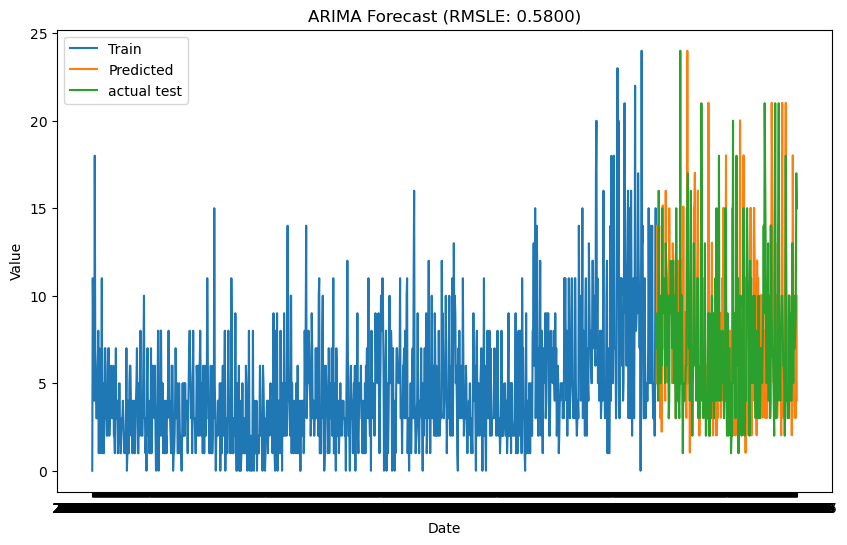

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/matthiaskargl/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836

0.6894178929222761


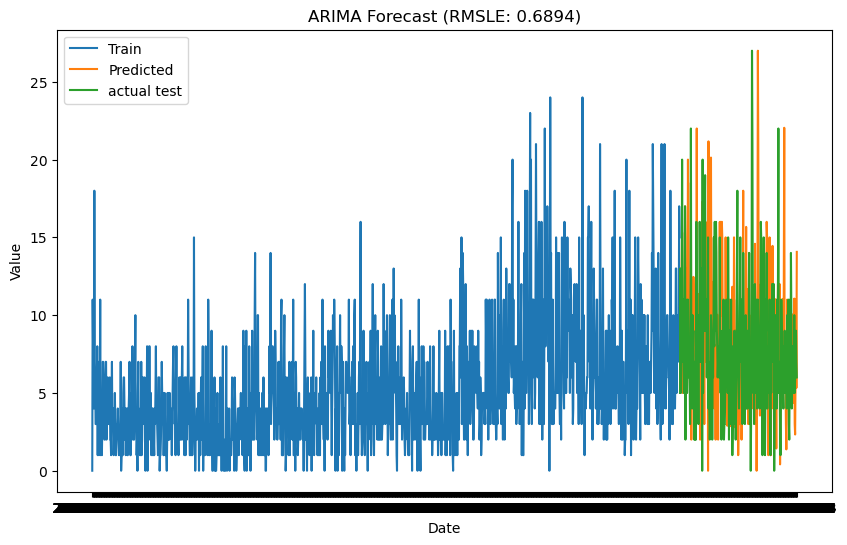

In [70]:
p, d, q = 3,0,3
tscv = TimeSeriesSplit(n_splits=5)

# Initialize an empty list to store ARIMA models
arima_models = []
time_index = testPair.index
for train_index, test_index in tscv.split(testPair):
    train_data = testPair.iloc[train_index]['target']
    test_data = testPair.iloc[test_index]['target']
    salesTrain = testPair.iloc[train_index]['sales']
    shiftedSalesTest = testPair.iloc[test_index]['shiftedSales14']

    # Fit ARIMA model
    model = ARIMA(train_data, order=(p, d, q))
    model_fit = model.fit()

    # Store the trained model
    arima_models.append(model_fit)

    forecast_steps = len(test_data)
    forecast = np.clip(model_fit.forecast(steps=forecast_steps), 0, 1e19)

    gtSales = test_data+ shiftedSalesTest
    predictedSales = forecast.values+ shiftedSalesTest

    # Calculate RMSLE
    rmsle = np.sqrt(mean_squared_log_error(test_data+ shiftedSalesTest, forecast.values+ shiftedSalesTest))
    print(rmsle)

    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(time_index[train_index], salesTrain, label='Train')
    plt.plot(time_index[test_index], predictedSales, label='Predicted')
    plt.plot(time_index[test_index], gtSales, label='actual test')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'ARIMA Forecast (RMSLE: {rmsle:.4f})')
    plt.legend()
    plt.show()


## LSTM
~0.6-0.8

In [116]:
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Input
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
from tensorflow.keras import layers

In [104]:
testPair.columns
featuresTrain = [
    #'sales', 
    'onpromotion', 
    #'target',
       'target_lag1', 'target_lag2', 'target_lag3']#, 'shiftedSales14']
allF = featuresTrain + ['shiftedSales14','target']

In [146]:
# window for lstm approach
look_back = 100
sequences = []
labels = []
offset = []
for i in range(testPair.shape[0]-look_back):
    window = testPair.iloc[i : i + look_back][['target','onpromotion']]
    label = testPair.iloc[i + look_back]['target']#['target']  # Next data point as label
    off = testPair.iloc[i + look_back][['shiftedSales14','sales']]
    sequences.append(window)
    labels.append(label)
    offset.append(off)
sequences, labels, offsets = np.array(sequences), np.array(labels), np.array(offset)

Epoch 1/50


/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_68941/2064257487.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 7.0613
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.9902
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.0140
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.0055
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.9866
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.9734
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.9697
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.9705
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.9677
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.9678
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.9692
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.9674
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.9650
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.9585
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.9502
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/

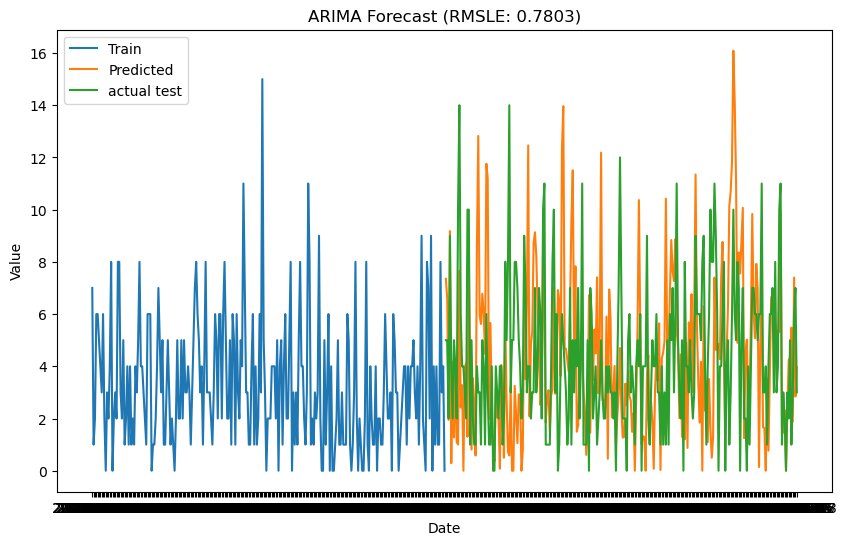

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 9.7695
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.6239
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.5190
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.4062
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.3263
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.2206
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 9.1717
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 10.6253
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.9881 
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 9.7230
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.1604
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.9282
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.7930
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.7474
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.7563
E

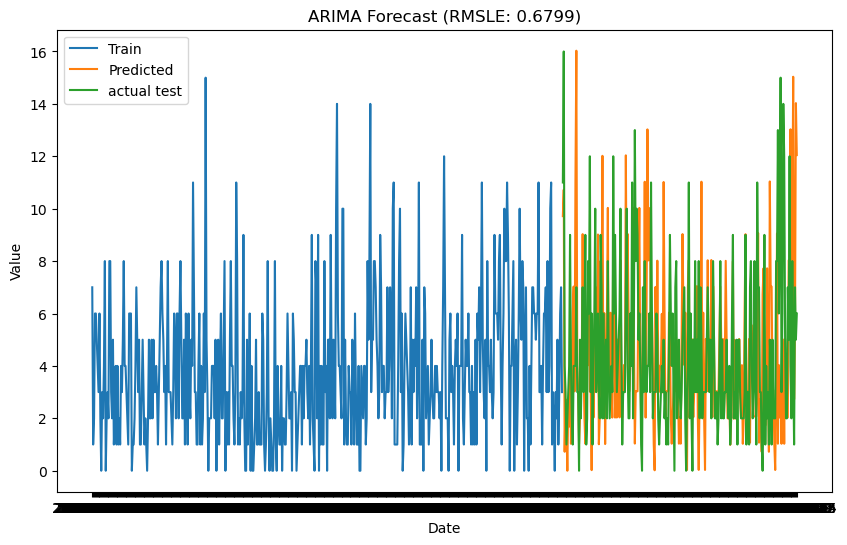

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 11.3618
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 10.9245
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 10.5507
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 10.3929
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 10.5508
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 10.4869
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 10.3519
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 10.2977
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 10.2704
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 10.2506
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 10.2351
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 10.2224
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 10.2108
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 10.1997
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - los

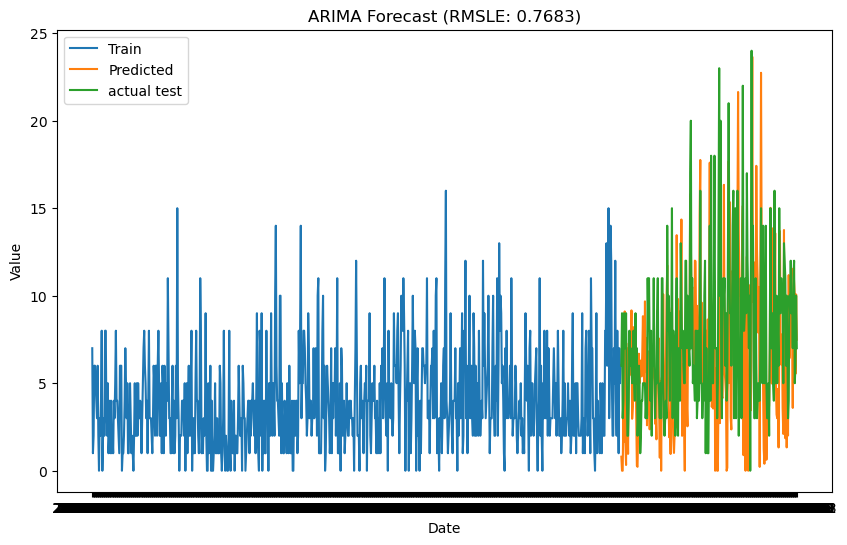

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 12.8198
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 12.5647
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 12.3097
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 12.2344
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 12.1454
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 12.0515
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 12.0172
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 11.9490
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 11.9082
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 11.8382
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 11.8230
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 11.7714
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 11.7477
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 11.7063
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - los

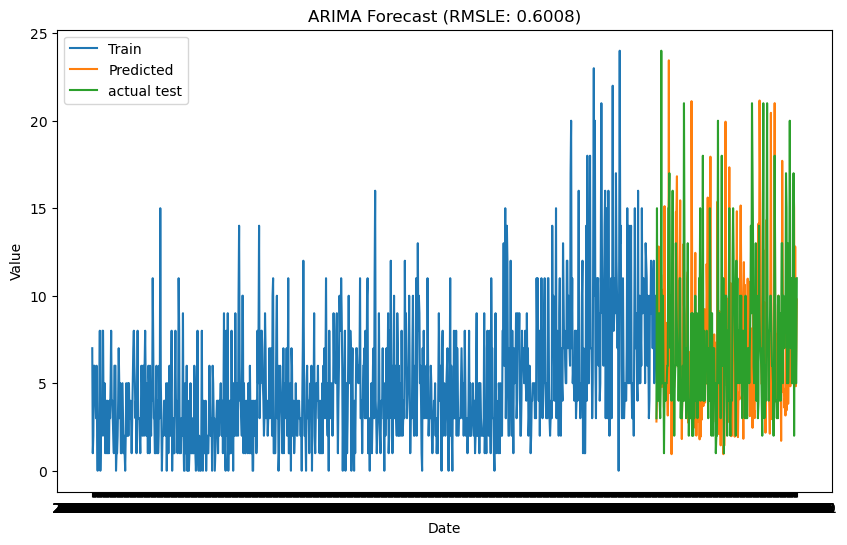

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 15.4872
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 14.7393
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 14.3544
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 14.2672
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 14.2248
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 14.2325
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 14.2295
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 14.2175
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 14.1557
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 14.1369
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 14.0384
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 14.0457
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 13.9910
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 13.9799
Epoch 15/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - los

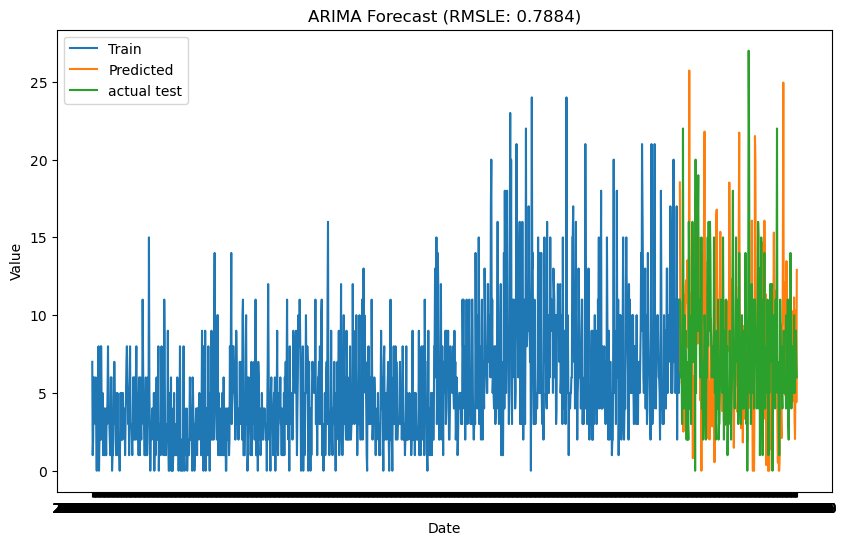

In [147]:
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

n_features = sequences.shape[2]

testPair.dropna(inplace=True)



for train_index, test_index in tscv.split(sequences):
    X_train, X_test = sequences[train_index], sequences[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Create an LSTM model
    model = Sequential()
    model.add(Input(shape=(look_back,n_features)))
    model.add(LSTM(64, activation='relu', return_sequences=True))
    model.add(LSTM(units=32, return_sequences=False))
    model.add(Dense(1))  # Single output for univariate forecasting

    # Compile and train the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=32)

    # Evaluate on the test set
    forecast = model.predict(X_test)
    print(f'RMSLE for fold: {rmsle:.4f}')

    gtSales = offsets[test_index,1]
    predictedSales = np.clip(np.reshape(forecast, (forecast.shape[0])) +offsets[test_index,0], 0,1e19)

    # Calculate RMSLE
    rmsle = np.sqrt(mean_squared_log_error(gtSales, predictedSales))
    print(rmsle)

    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(time_index[train_index], offsets[train_index,1], label='Train')
    plt.plot(time_index[test_index], predictedSales, label='Predicted')
    plt.plot(time_index[test_index], gtSales, label='actual test')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'ARIMA Forecast (RMSLE: {rmsle:.4f})')
    plt.legend()
    plt.show()


## LSTM with direct values (no diff)
- use loss directly to train with
- sometimes just predicts 0

~0.2-0.3

Epoch 1/50


/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_68941/2555328435.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.8475 - mse: 16.1877 - val_loss: 2.2118 - val_mse: 25.2114
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 1.7057 - mse: 15.7671 - val_loss: 2.0014 - val_mse: 24.3969
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 1.5759 - mse: 15.3444 - val_loss: 1.8111 - val_mse: 23.5669
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 1.4549 - mse: 14.9130 - val_loss: 1.6343 - val_mse: 22.6993
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - loss: 1.3402 - mse: 14.4652 - val_loss: 1.4655 - val_mse: 21.7665
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 1.2296 - mse: 13.9911 - val_loss: 1.3001 - val_mse: 20.7305
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 1.1203 - mse: 13.4750 - val_loss: 1.1344 - val_mse: 19.5383
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 1.0106 - mse: 12.8982 - val_loss: 0.9644 - val_mse: 18.1010
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.8989 - mse

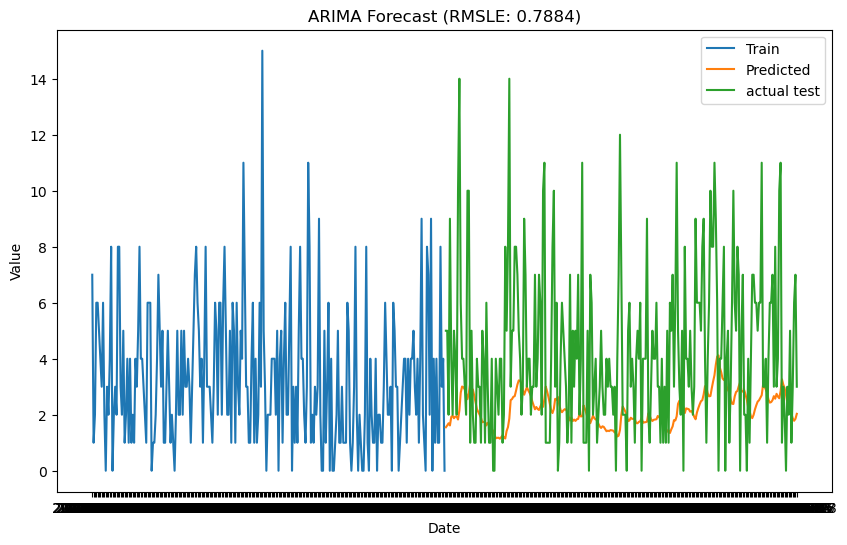

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - loss: 2.3441 - mse: 21.8238 - val_loss: 2.7439 - val_mse: 29.2835
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 2.3441 - mse: 21.8238 - val_loss: 2.7439 - val_mse: 29.2835
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 2.3441 - mse: 21.8238 - val_loss: 2.7439 - val_mse: 29.2835
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 2.3441 - mse: 21.8238 - val_loss: 2.7439 - val_mse: 29.2835
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 2.3441 - mse: 21.8238 - val_loss: 2.7439 - val_mse: 29.2835
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 2.3441 - mse: 21.8238 - val_loss: 2.7439 - val_mse: 29.2835
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 2.3441 - mse: 21.8238 - val_loss: 2.7439 - val_mse: 29.2835
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 2.3441 - mse: 21.8238 - val_loss: 2.7439 - val_mse: 29.2835
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 2.34

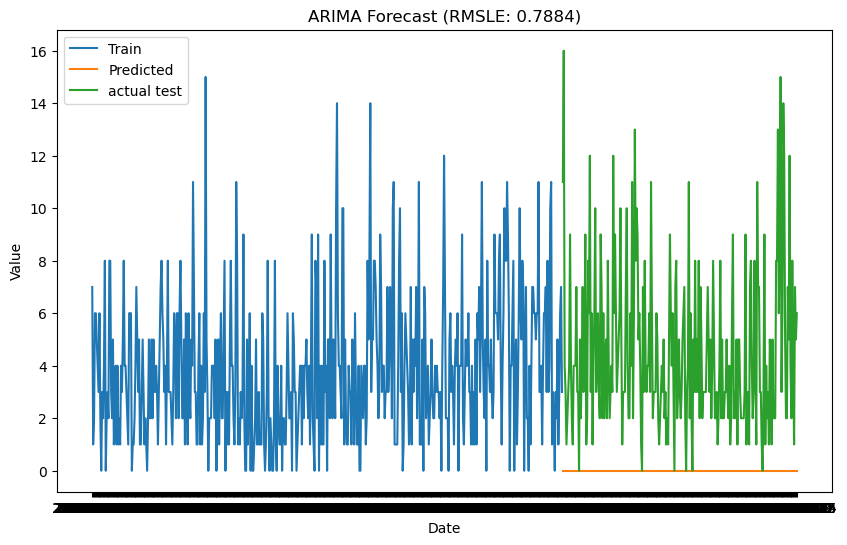

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 2.4483 - mse: 24.1790 - val_loss: 3.7349 - val_mse: 73.1243
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 1.8066 - mse: 21.9202 - val_loss: 1.1595 - val_mse: 48.2234
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 1.1144 - mse: 18.1301 - val_loss: 11.6682 - val_mse: 1045581.8750
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.6436 - mse: 13.7778 - val_loss: 10.9102 - val_mse: 306773.7500
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.4781 - mse: 11.0242 - val_loss: 10.1179 - val_mse: 499341.3750
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.4264 - mse: 9.9518 - val_loss: 4.0160 - val_mse: 15359.0889
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.4025 - mse: 9.4424 - val_loss: 6.0307 - val_mse: 76307.2422
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.3902 - mse: 9.0485 - val_loss: 8.2825 - val_mse: 317210.9688
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 

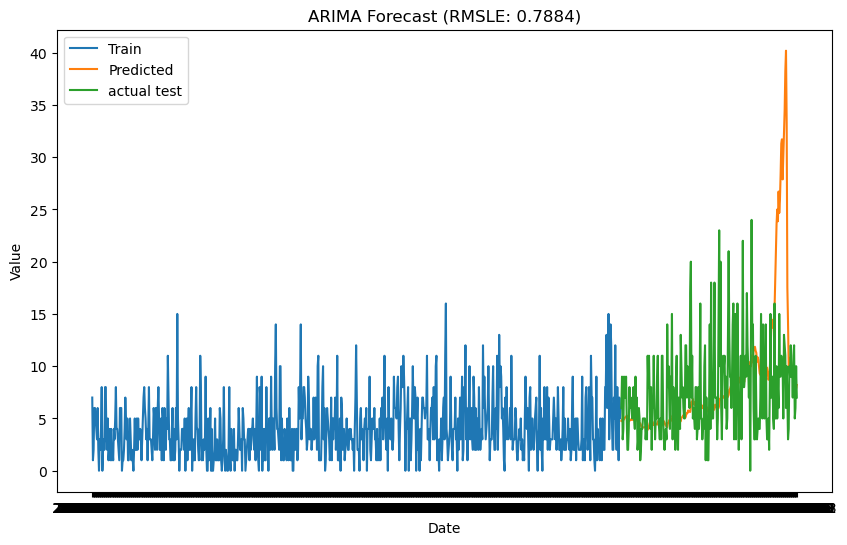

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 2.1240 - mse: 36.0950 - val_loss: 0.4698 - val_mse: 29.6738
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 1.1293 - mse: 25.3858 - val_loss: 0.3739 - val_mse: 44.7000
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.9673 - mse: 932.5066 - val_loss: 0.3050 - val_mse: 21.6869
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.6211 - mse: 17.4911 - val_loss: 0.5829 - val_mse: 45.4128
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.5589 - mse: 19.1909 - val_loss: 0.6161 - val_mse: 48.0794
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.4989 - mse: 16.8531 - val_loss: 0.4507 - val_mse: 30.4397
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.4452 - mse: 13.7099 - val_loss: 0.3253 - val_mse: 21.4094
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.4025 - mse: 12.0977 - val_loss: 0.2805 - val_mse: 19.5270
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.378

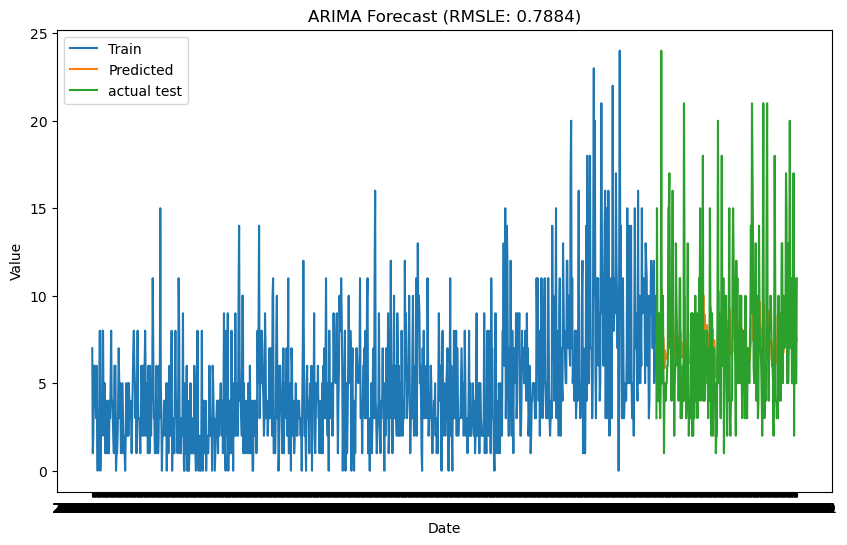

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 1.7091 - mse: 7957.8330 - val_loss: 5.5626 - val_mse: 91695.7969
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 2.3077 - mse: 1023442.8125 - val_loss: 0.6865 - val_mse: 37.6979
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 1.0298 - mse: 28.9328 - val_loss: 0.9783 - val_mse: 45.7129
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 1.0177 - mse: 28.0409 - val_loss: 0.9168 - val_mse: 44.3331
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.9814 - mse: 28.0115 - val_loss: 0.8388 - val_mse: 42.4617
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.9285 - mse: 27.3411 - val_loss: 0.7571 - val_mse: 40.3308
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.8711 - mse: 26.4348 - val_loss: 0.6774 - val_mse: 38.0493
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.8154 - mse: 25.4413 - val_loss: 0.6059 - val_mse: 35.7882
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - l

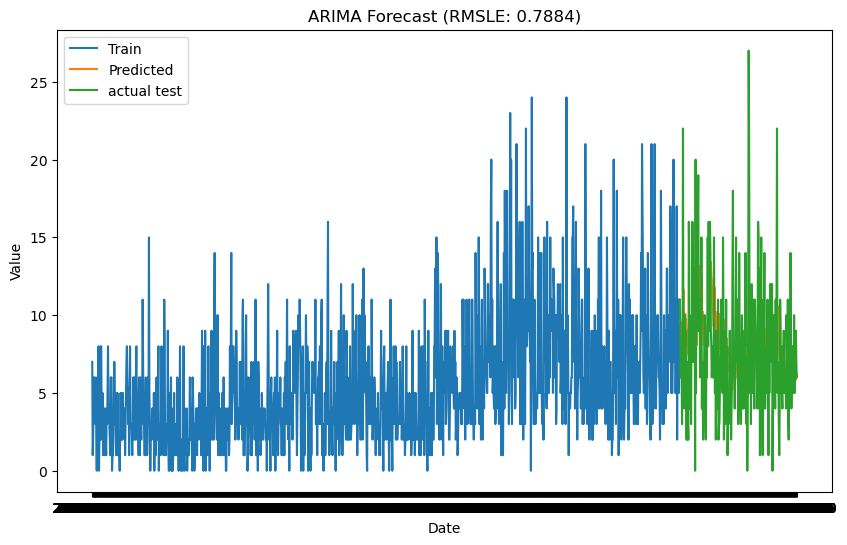

In [160]:
# window for lstm approach
look_back = 100
sequences = []
labels = []
for i in range(testPair.shape[0]-look_back):
    window = testPair.iloc[i : i + look_back][['sales','onpromotion']]
    label = testPair.iloc[i + look_back]['sales']#['target']  # Next data point as label
    sequences.append(window)
    labels.append(label)
    offset.append(off)
sequences, labels = np.array(sequences), np.array(labels)

n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

n_features = sequences.shape[2]

testPair.dropna(inplace=True)



for train_index, test_index in tscv.split(sequences):
    X_train, X_test = sequences[train_index], sequences[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Create an LSTM model
    model = Sequential()
    model.add(Input(shape=(look_back,n_features)))
    model.add(LSTM(64, activation='relu', return_sequences=False))
    #model.add(LSTM(units=32, return_sequences=False))
    model.add(Dense(1, activation='relu'))  # Single output for univariate forecasting

    # Compile and train the model
    model.compile(optimizer='adam', loss=tf.keras.losses.MSLE, metrics=['mse'])
    model.fit(X_train, y_train, epochs=50, batch_size=320,validation_data=(X_test, y_test))

    # Evaluate on the test set
    forecast = model.predict(X_test)
    print(f'RMSLE for fold: {rmsle:.4f}')

    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(time_index[train_index], labels[train_index], label='Train')
    plt.plot(time_index[test_index], forecast, label='Predicted')
    plt.plot(time_index[test_index], labels[test_index], label='actual test')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'ARIMA Forecast (RMSLE: {rmsle:.4f})')
    plt.legend()
    plt.show()


## predict next 15 values (direct)
~0.5 / 0.6 (val)

In [193]:
# window for lstm approach
look_back = 100
sequences = []
labels = []
n_predictedValues = 15
for i in range(testPair.shape[0]-look_back-n_predictedValues):
    window = testPair.iloc[i : i + look_back][['sales','onpromotion']]
    label = testPair.iloc[(i + look_back) : (i + look_back + n_predictedValues)]['sales'].values#['target']  # Next data point as label
    sequences.append(window)
    labels.append(label)
    offset.append(off)
sequences, labels = np.array(sequences), np.array(labels)

n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

n_features = sequences.shape[2]

testPair.dropna(inplace=True)

# Create an LSTM model
model = Sequential()
model.add(Input(shape=(look_back,n_features)))
model.add(LSTM(64, activation='relu', return_sequences=False))
#model.add(LSTM(units=32, return_sequences=False))
model.add(Dense(n_predictedValues, activation='relu'))  # Single output for univariate forecasting
# Compile and train the model
model.compile(optimizer='adam', loss=tf.keras.losses.MSLE, metrics=['mse'])

for train_index, test_index in tscv.split(sequences):
    X_train, X_test = sequences[train_index], sequences[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    model.fit(X_train, y_train, epochs=50, batch_size=320,validation_data=(X_test, y_test))

    # Evaluate on the test set
    forecast = model.predict(X_test)

    # Plot actual vs. predicted values
    #plt.figure(figsize=(10, 6))
    #plt.plot(time_index[train_index], labels[train_index], label='Train')
    #plt.plot(time_index[test_index], forecast, label='Predicted')
    #plt.plot(time_index[test_index], labels[test_index], label='actual test')
    #plt.xlabel('Date')
    #plt.ylabel('Value')
    ##plt.title(f'ARIMA Forecast (RMSLE: {rmsle:.4f})')
    #plt.legend()
    #plt.show()


/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_68941/4186375608.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 1.7335 - mse: 15.9938 - val_loss: 2.1139 - val_mse: 24.8637
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 1.6902 - mse: 15.8225 - val_loss: 2.0286 - val_mse: 24.3817
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 1.6448 - mse: 15.6284 - val_loss: 1.9175 - val_mse: 23.6171
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 1.5945 - mse: 15.3970 - val_loss: 1.7928 - val_mse: 25.3850
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 1.5339 - mse: 15.0992 - val_loss: 1.9545 - val_mse: 185.8290
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 1.4549 - mse: 14.6700 - val_loss: 3.5824 - val_mse: 6583.1255
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 1.3365 - mse: 14.0108 - val_loss: 3.0256 - val_mse: 4037.4878
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 1.3264 - mse: 13.8337 - val_loss: 6.5900 - val_mse: 6696743.0000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step

In [196]:
def plotidx(ind):
    plt.figure(figsize=(10, 6))
    mintimeIdx = test_index[ind] - look_back
    plt.plot(time_index[mintimeIdx:test_index[ind]], X_test[ind,:,0], label='Train')
    plt.plot(time_index[test_index][ind:ind+n_predictedValues], forecast[ind,:], label='Predicted')
    plt.plot(time_index[test_index][ind:ind+n_predictedValues], labels[test_index][ind,:], label='actual test')
    plt.xlabel('Date')
    plt.ylabel('Value')
    #plt.title(f'ARIMA Forecast (RMSLE: {rmsle:.4f})')
    plt.legend()
    plt.show()

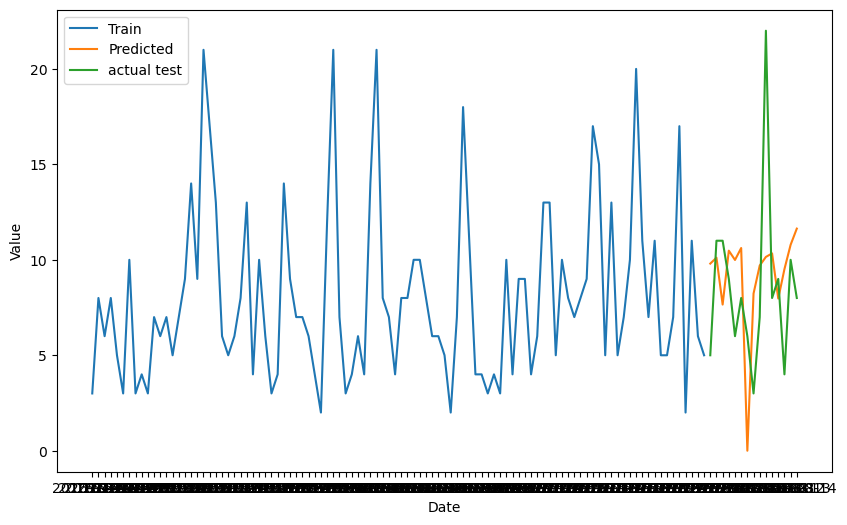

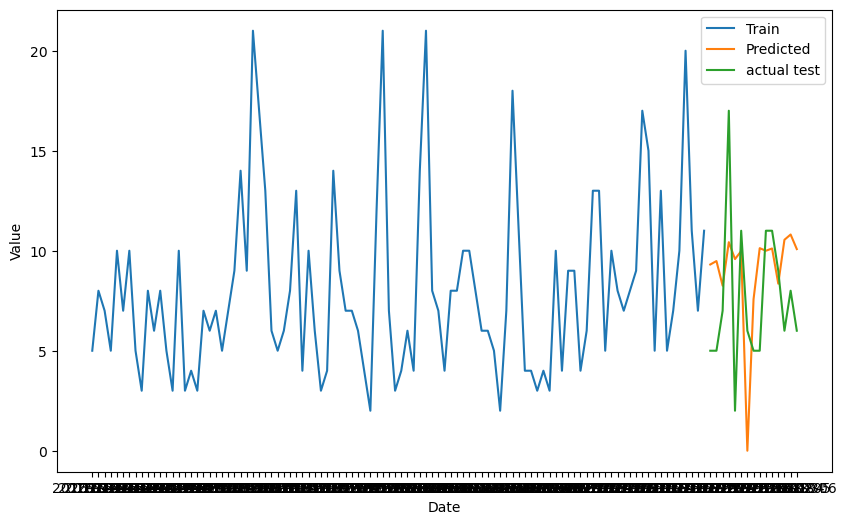

# build dataset for lstm 

In [ ]:
# window for lstm approach
look_back = 100
sequences = []
labels = []
n_predictedValues = 15
for i in range(testPair.shape[0]-look_back-n_predictedValues):
    window = testPair.iloc[i : i + look_back][['sales','onpromotion']]
    label = testPair.iloc[(i + look_back) : (i + look_back + n_predictedValues)]['sales'].values#['target']  # Next data point as label
    sequences.append(window)
    labels.append(label)
    offset.append(off)
sequences, labels = np.array(sequences), np.array(labels)

n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

n_features = sequences.shape[2]

testPair.dropna(inplace=True)

# Create an LSTM model
model = Sequential()
model.add(Input(shape=(look_back,n_features)))
model.add(LSTM(64, activation='relu', return_sequences=False))
#model.add(LSTM(units=32, return_sequences=False))
model.add(Dense(n_predictedValues, activation='relu'))  # Single output for univariate forecasting
# Compile and train the model
model.compile(optimizer='adam', loss=tf.keras.losses.MSLE, metrics=['mse'])

for train_index, test_index in tscv.split(sequences):
    X_train, X_test = sequences[train_index], sequences[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    model.fit(X_train, y_train, epochs=50, batch_size=320,validation_data=(X_test, y_test))

    # Evaluate on the test set
    forecast = model.predict(X_test)

    # Plot actual vs. predicted values
    #plt.figure(figsize=(10, 6))
    #plt.plot(time_index[train_index], labels[train_index], label='Train')
    #plt.plot(time_index[test_index], forecast, label='Predicted')
    #plt.plot(time_index[test_index], labels[test_index], label='actual test')
    #plt.xlabel('Date')
    #plt.ylabel('Value')
    ##plt.title(f'ARIMA Forecast (RMSLE: {rmsle:.4f})')
    #plt.legend()
    #plt.show()
